Name: Shreyas Dongre   
Roll no: 082          
Stream: CS (AI)      
Division: I                         
Semester: 5th Semester                                           
Batch: I-3            
                                                                       Date: 13/9/2022       
Subject: DL
###Assignment-6

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('seeds.csv')

df

Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0    15.26      14.84       0.8710          5.763         3.312   
1    14.88      14.57       0.8811          5.554         3.333   
2    14.29      14.09       0.9050          5.291         3.337   
3    13.84      13.94       0.8955          5.324         3.379   
4    16.14      14.99       0.9034          5.658         3.562   
..     ...        ...          ...            ...           ...   
194  12.19      13.20       0.8783          5.137         2.981   
195  11.23      12.88       0.8511          5.140         2.795   
196  13.20      13.66       0.8883          5.236         3.232   
197  11.84      13.21       0.8521          5.175         2.836   
198  12.30      13.34       0.8684          5.243         2.974   

     Asymmetry.Coeff  Kernel.Groove  Type  
0              2.221          5.220     1  
1              1.018          4.956     1  
2              2.699          4.825     1  
3              2.259          4.805     1  
4              1.355          5.175     1  
..               ...            ...   ...  
194            3.631          4.870     3  
195            4.325          5.003     3  
196            8.315          5.056     3  
197            3.598          5.044     3  
198            5.637          5.063     3  

[199 rows x 8 columns]

In [7]:
label = np.array(df.iloc[:,-1])
label.shape

(199,)

In [8]:
from sklearn.preprocessing import OneHotEncoder
label =label.reshape(-1,1)

In [9]:
onehot_encoder=OneHotEncoder(sparse=False)
y_onehot=onehot_encoder.fit_transform(label)
y_onehot.shape

(199, 3)

In [10]:
dataset=pd.DataFrame({'Type1':y_onehot[:,0],'Type2':y_onehot[:,1],'Type3':y_onehot[:,2]})

In [11]:
dataset.head()

Type1  Type2  Type3
0    1.0    0.0    0.0
1    1.0    0.0    0.0
2    1.0    0.0    0.0
3    1.0    0.0    0.0
4    1.0    0.0    0.0

In [12]:
final_df=pd.concat([df,dataset],axis=1)
final_df.head()

Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   Asymmetry.Coeff  Kernel.Groove  Type  Type1  Type2  Type3  
0            2.221          5.220     1    1.0    0.0    0.0  
1            1.018          4.956     1    1.0    0.0    0.0  
2            2.699          4.825     1    1.0    0.0    0.0  
3            2.259          4.805     1    1.0    0.0    0.0  
4            1.355          5.175     1    1.0    0.0    0.0

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
final_df.iloc[:,[0,1,2,3]]=std_scaler.fit_transform(final_df.iloc[:,[0,1,2,3]])
final_df.head()

Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0  0.117164   0.186797     0.008144       0.270860         3.312   
1 -0.013302  -0.019760     0.442341      -0.201481         3.333   
2 -0.215868  -0.386972     1.469798      -0.795861         3.337   
3 -0.370368  -0.501725     1.061395      -0.721281         3.379   
4  0.419297   0.301550     1.401014       0.033559         3.562   

   Asymmetry.Coeff  Kernel.Groove  Type  Type1  Type2  Type3  
0            2.221          5.220     1    1.0    0.0    0.0  
1            1.018          4.956     1    1.0    0.0    0.0  
2            2.699          4.825     1    1.0    0.0    0.0  
3            2.259          4.805     1    1.0    0.0    0.0  
4            1.355          5.175     1    1.0    0.0    0.0

In [14]:
X=final_df.iloc[:,0:7].values
Y=final_df.iloc[:,8:11].values

In [15]:
X.shape

(199, 7)

In [16]:
Y.shape

(199, 3)

In [17]:
x_train,x_val,y_train,y_val=train_test_split(X,Y,test_size=0.2,random_state=np.random.seed(10))

In [18]:
x_train.shape

(159, 7)

In [19]:
x_val.shape

(40, 7)

In [20]:
y_train.shape

(159, 3)

In [21]:
y_val.shape

(40, 3)

In [22]:
from keras import layers
from keras import models
model=models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(7,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [23]:
from tensorflow.keras.optimizers import SGD
opt=SGD(learning_rate=0.1)

In [24]:
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [26]:
model1=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 49ms/step - loss: 0.8822 - accuracy: 0.5660 - val_loss: 0.6919 - val_accuracy: 0.6250
Epoch 2/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5618 - accuracy: 0.7925 - val_loss: 0.5185 - val_accuracy: 0.8500
Epoch 3/200
5/5 [==============================] - 0s 7ms/step - loss: 0.4785 - accuracy: 0.8113 - val_loss: 0.4289 - val_accuracy: 0.9000
Epoch 4/200
5/5 [==============================] - 0s 8ms/step - loss: 0.4032 - accuracy: 0.8742 - val_loss: 0.4342 - val_accuracy: 0.7750
Epoch 5/200
5/5 [==============================] - 0s 8ms/step - loss: 0.4744 - accuracy: 0.7987 - val_loss: 1.4482 - val_accuracy: 0.4000
Epoch 6/200
5/5 [==============================] - 0s 8ms/step - loss: 0.7887 - accuracy: 0.6164 - val_loss: 0.3116 - val_accuracy: 0.9750
Epoch 7/200
5/5 [==============================] - 0s 14ms/step - loss: 0.3329 - accuracy: 0.8805 - val_loss: 0.2400 - val_accuracy: 0.9500
Epoch 8/200
5/5 [========

Text(0.5, 1.0, 'learning rate=0.1')

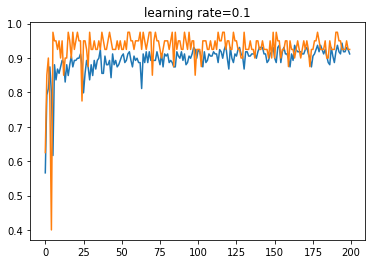

In [27]:
plt.plot(model1.history['accuracy'],label='train')
plt.plot(model1.history['val_accuracy'],label='train')
plt.title('learning rate=0.1')

Epoch 1/200
5/5 [==============================] - 0s 40ms/step - loss: 0.1303 - accuracy: 0.9308 - val_loss: 0.1287 - val_accuracy: 0.9250
Epoch 2/200
5/5 [==============================] - 0s 7ms/step - loss: 0.1272 - accuracy: 0.9371 - val_loss: 0.1255 - val_accuracy: 0.9250
Epoch 3/200
5/5 [==============================] - 0s 7ms/step - loss: 0.1265 - accuracy: 0.9308 - val_loss: 0.1245 - val_accuracy: 0.9250
Epoch 4/200
5/5 [==============================] - 0s 8ms/step - loss: 0.1267 - accuracy: 0.9308 - val_loss: 0.1231 - val_accuracy: 0.9250
Epoch 5/200
5/5 [==============================] - 0s 8ms/step - loss: 0.1281 - accuracy: 0.9308 - val_loss: 0.1219 - val_accuracy: 0.9250
Epoch 6/200
5/5 [==============================] - 0s 8ms/step - loss: 0.1272 - accuracy: 0.9308 - val_loss: 0.1231 - val_accuracy: 0.9250
Epoch 7/200
5/5 [==============================] - 0s 7ms/step - loss: 0.1267 - accuracy: 0.9308 - val_loss: 0.1224 - val_accuracy: 0.9250
Epoch 8/200
5/5 [=========

Text(0.5, 1.0, 'learning rate=0.01')

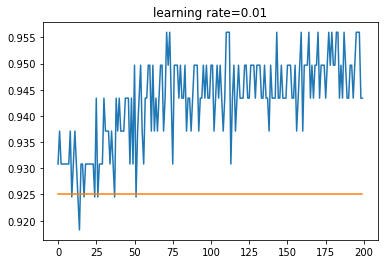

In [28]:
opt1=SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer=opt1,metrics=['accuracy'])
model2=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200)



plt.plot(model2.history['accuracy'],label='train')
plt.plot(model2.history['val_accuracy'],label='train')
plt.title('learning rate=0.01')

Epoch 1/200
5/5 [==============================] - 1s 44ms/step - loss: 0.1108 - accuracy: 0.9560 - val_loss: 0.1394 - val_accuracy: 0.9250
Epoch 2/200
5/5 [==============================] - 0s 8ms/step - loss: 0.1108 - accuracy: 0.9560 - val_loss: 0.1393 - val_accuracy: 0.9250
Epoch 3/200
5/5 [==============================] - 0s 9ms/step - loss: 0.1107 - accuracy: 0.9560 - val_loss: 0.1392 - val_accuracy: 0.9250
Epoch 4/200
5/5 [==============================] - 0s 7ms/step - loss: 0.1106 - accuracy: 0.9560 - val_loss: 0.1392 - val_accuracy: 0.9250
Epoch 5/200
5/5 [==============================] - 0s 7ms/step - loss: 0.1107 - accuracy: 0.9560 - val_loss: 0.1391 - val_accuracy: 0.9250
Epoch 6/200
5/5 [==============================] - 0s 7ms/step - loss: 0.1110 - accuracy: 0.9560 - val_loss: 0.1391 - val_accuracy: 0.9250
Epoch 7/200
5/5 [==============================] - 0s 7ms/step - loss: 0.1105 - accuracy: 0.9560 - val_loss: 0.1390 - val_accuracy: 0.9250
Epoch 8/200
5/5 [=========

Text(0.5, 1.0, 'learning rate=0.001')

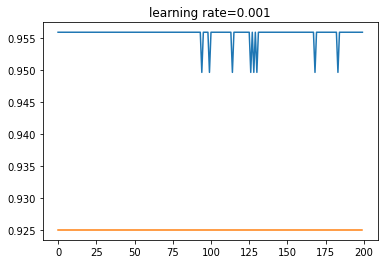

In [29]:
opt2=SGD(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer=opt2,metrics=['accuracy'])
model3=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200)



plt.plot(model3.history['accuracy'],label='train')
plt.plot(model3.history['val_accuracy'],label='train')
plt.title('learning rate=0.001')

Epoch 1/200
5/5 [==============================] - 1s 42ms/step - loss: 0.1094 - accuracy: 0.9560 - val_loss: 0.1384 - val_accuracy: 0.9250
Epoch 2/200
5/5 [==============================] - 0s 8ms/step - loss: 0.1094 - accuracy: 0.9560 - val_loss: 0.1384 - val_accuracy: 0.9250
Epoch 3/200
5/5 [==============================] - 0s 12ms/step - loss: 0.1094 - accuracy: 0.9560 - val_loss: 0.1384 - val_accuracy: 0.9250
Epoch 4/200
5/5 [==============================] - 0s 12ms/step - loss: 0.1094 - accuracy: 0.9560 - val_loss: 0.1384 - val_accuracy: 0.9250
Epoch 5/200
5/5 [==============================] - 0s 7ms/step - loss: 0.1094 - accuracy: 0.9560 - val_loss: 0.1384 - val_accuracy: 0.9250
Epoch 6/200
5/5 [==============================] - 0s 12ms/step - loss: 0.1094 - accuracy: 0.9560 - val_loss: 0.1384 - val_accuracy: 0.9250
Epoch 7/200
5/5 [==============================] - 0s 8ms/step - loss: 0.1093 - accuracy: 0.9560 - val_loss: 0.1384 - val_accuracy: 0.9250
Epoch 8/200
5/5 [======

Text(0.5, 1.0, 'learning rate=0.0001')

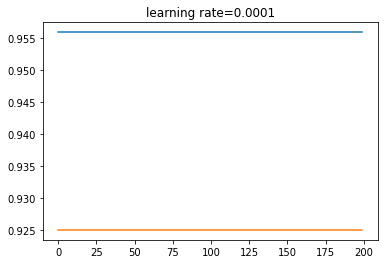

In [30]:
opt3=SGD(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt3,metrics=['accuracy'])
model4=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200)



plt.plot(model4.history['accuracy'],label='train')
plt.plot(model4.history['val_accuracy'],label='train')
plt.title('learning rate=0.0001')

In [31]:
data2=[['1','0.1',model1.history.get('accuracy')[-1],model1.history.get('val_accuracy')[-1],model1.history.get('val_loss')[-1]],
       ['2','0.01',model2.history.get('accuracy')[-1],model2.history.get('val_accuracy')[-1],model2.history.get('val_loss')[-1]],
       ['3','0.001',model3.history.get('accuracy')[-1],model3.history.get('val_accuracy')[-1],model3.history.get('val_loss')[-1]],
       ['4','0.0001',model4.history.get('accuracy')[-1],model4.history.get('val_accuracy')[-1],model4.history.get('val_loss')[-1]]]

df4 = pd.DataFrame(data2,columns=['SNo','Learning rate','Training accuracy','Validation Accuracy','Validation loss'])

df4

SNo Learning rate  Training accuracy  Validation Accuracy  Validation loss
0   1           0.1           0.911950                0.925         0.134791
1   2          0.01           0.943396                0.925         0.139422
2   3         0.001           0.955975                0.925         0.138441
3   4        0.0001           0.955975                0.925         0.138472

Text(0.5, 1.0, 'momentum=0.1')

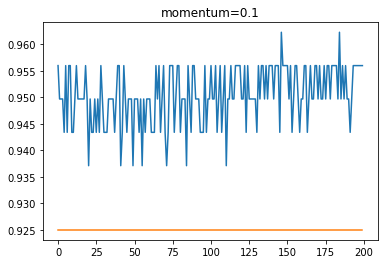

In [33]:
opt_best=SGD(learning_rate=0.01,momentum=0.1)
model.compile(loss='categorical_crossentropy',optimizer=opt_best,metrics=['accuracy'])
model5=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200,verbose=0)

plt.plot(model5.history['accuracy'],label='train')
plt.plot(model5.history['val_accuracy'],label='train')
plt.title('momentum=0.1')

Text(0.5, 1.0, 'momentum=0.5')

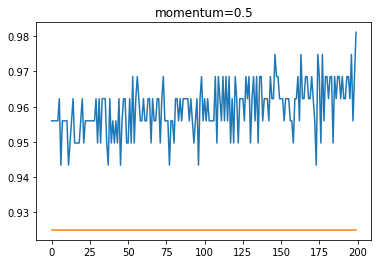

In [34]:
opt_best2=SGD(learning_rate=0.01,momentum=0.5)
model.compile(loss='categorical_crossentropy',optimizer=opt_best2,metrics=['accuracy'])
model6=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200,verbose=0)

plt.plot(model6.history['accuracy'],label='train')
plt.plot(model6.history['val_accuracy'],label='train')
plt.title('momentum=0.5')

Text(0.5, 1.0, 'momentum=0.9')

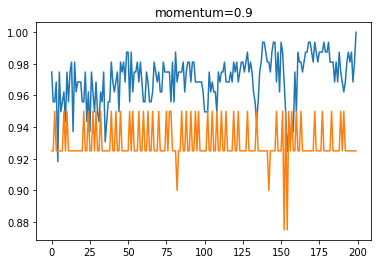

In [35]:
opt_best3=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt_best3,metrics=['accuracy'])
model7=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200,verbose=0)

plt.plot(model7.history['accuracy'],label='train')
plt.plot(model7.history['val_accuracy'],label='train')
plt.title('momentum=0.9')

Text(0.5, 1.0, 'momentum=0.99')

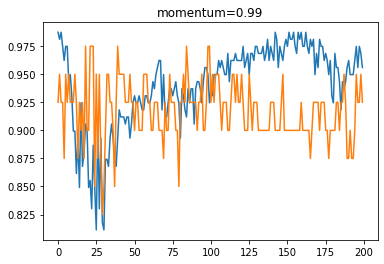

In [36]:
opt_best4=SGD(learning_rate=0.01,momentum=0.99)
model.compile(loss='categorical_crossentropy',optimizer=opt_best4,metrics=['accuracy'])
model8=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200,verbose=0)

plt.plot(model8.history['accuracy'],label='train')
plt.plot(model8.history['val_accuracy'],label='train')
plt.title('momentum=0.99')

In [39]:
data3=[['1','0.01','0.1',model5.history.get('accuracy')[-1],model1.history.get('val_accuracy')[-1],model1.history.get('val_loss')[-1]],
       ['2','0.01','0.5',model6.history.get('accuracy')[-1],model2.history.get('val_accuracy')[-1],model2.history.get('val_loss')[-1]],
       ['3','0.01','0.9',model7.history.get('accuracy')[-1],model3.history.get('val_accuracy')[-1],model3.history.get('val_loss')[-1]],
       ['4','0.01','0.99',model8.history.get('accuracy')[-1],model4.history.get('val_accuracy')[-1],model4.history.get('val_loss')[-1]]]

df5 = pd.DataFrame(data3,columns=['SNo','Learning rate','Momentum','Training accuracy','Validation Accuracy','Validation loss'])

df5

SNo Learning rate Momentum  Training accuracy  Validation Accuracy  \
0   1          0.01      0.1           0.955975                0.925   
1   2          0.01      0.5           0.981132                0.925   
2   3          0.01      0.9           1.000000                0.925   
3   4          0.01     0.99           0.955975                0.925   

   Validation loss  
0         0.134791  
1         0.139422  
2         0.138441  
3         0.138472

Text(0.5, 1.0, 'decay=0.1')

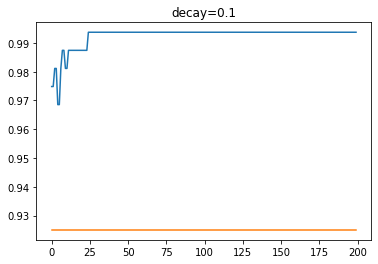

In [40]:
opt_best5=SGD(learning_rate=0.01,momentum=0.9,decay=0.1)
model.compile(loss='categorical_crossentropy',optimizer=opt_best5,metrics=['accuracy'])
model9=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200,verbose=0)

plt.plot(model9.history['accuracy'],label='train')
plt.plot(model9.history['val_accuracy'],label='train')
plt.title('decay=0.1')

Text(0.5, 1.0, 'decay=0.01')

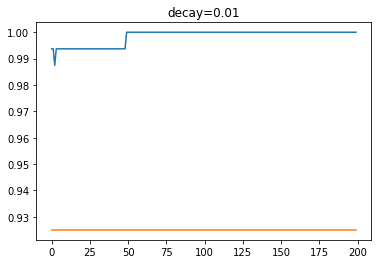

In [41]:
opt_best6=SGD(learning_rate=0.01,momentum=0.99,decay=0.01)
model.compile(loss='categorical_crossentropy',optimizer=opt_best6,metrics=['accuracy'])
model10=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200,verbose=0)

plt.plot(model10.history['accuracy'],label='train')
plt.plot(model10.history['val_accuracy'],label='train')
plt.title('decay=0.01')

In [53]:
data4=[['1','0.01','0.9','0.1',model9.history.get('accuracy')[-1],model1.history.get('val_accuracy')[-1],model1.history.get('val_loss')[-1]],
       ['2','0.01','0.99','0.01',model10.history.get('accuracy')[-1],model2.history.get('val_accuracy')[-1],model2.history.get('val_loss')[-1]]]

df6 = pd.DataFrame(data4,columns=['SNo','Learning rate','Momentum','Decay','Training accuracy','Validation Accuracy','Validation loss'])

df6

SNo Learning rate Momentum Decay  Training accuracy  Validation Accuracy  \
0   1          0.01      0.9   0.1           0.993711                0.925   
1   2          0.01     0.99  0.01           1.000000                0.925   

   Validation loss  
0         0.134791  
1         0.139422

Ans: Thus we can see that SGD with learning rate=0.01, momentum=0.9 & decay=0.1 gives the best ouput among SGD models

Text(0.5, 1.0, 'Adagrad - Learning rate = 0.01')

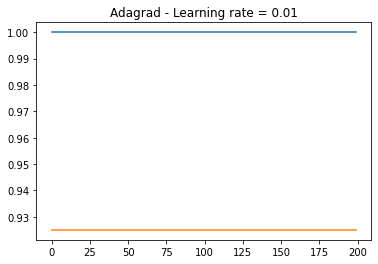

In [50]:
#adagrad, adam, rms prop
from tensorflow.keras.optimizers import Adagrad
opt_1=Adagrad(learning_rate=0.01)

model.compile(loss='categorical_crossentropy',optimizer=opt_1,metrics=['accuracy'])
model11=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200,verbose=0)

plt.plot(model11.history['accuracy'],label='train')
plt.plot(model11.history['val_accuracy'],label='train')
plt.title('Adagrad - Learning rate = 0.01')

Text(0.5, 1.0, 'Adam - Learning rate = 0.01')

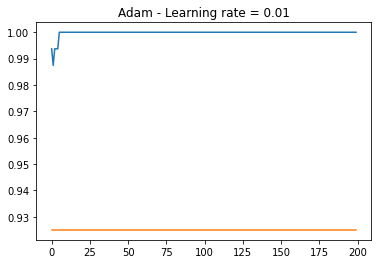

In [51]:
from tensorflow.keras.optimizers import Adam
opt_2=Adam(learning_rate=0.01)

model.compile(loss='categorical_crossentropy',optimizer=opt_2,metrics=['accuracy'])
model12=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200,verbose=0)

plt.plot(model12.history['accuracy'],label='train')
plt.plot(model12.history['val_accuracy'],label='train')
plt.title('Adam - Learning rate = 0.01')

Text(0.5, 1.0, 'RMSprop - Learning rate = 0.01')

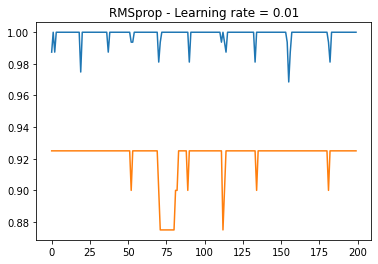

In [52]:
from tensorflow.keras.optimizers import RMSprop
opt_3=RMSprop(learning_rate=0.01)

model.compile(loss='categorical_crossentropy',optimizer=opt_3,metrics=['accuracy'])
model13=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200,verbose=0)

plt.plot(model13.history['accuracy'],label='train')
plt.plot(model13.history['val_accuracy'],label='train')
plt.title('RMSprop - Learning rate = 0.01')

In [55]:
data5=[['1','Stochastic Gradient Descent','0.01','0.9','0.1',model9.history.get('accuracy')[-1],model1.history.get('val_accuracy')[-1],model1.history.get('val_loss')[-1]],
       ['2','Adagrad','0.01','N/A','N/A',model11.history.get('accuracy')[-1],model2.history.get('val_accuracy')[-1],model2.history.get('val_loss')[-1]],
       ['3','Adam','0.01','N/A','N/A',model12.history.get('accuracy')[-1],model2.history.get('val_accuracy')[-1],model2.history.get('val_loss')[-1]],
       ['4','RMSprop','0.01','N/A','N/A',model13.history.get('accuracy')[-1],model2.history.get('val_accuracy')[-1],model2.history.get('val_loss')[-1]]]

df7 = pd.DataFrame(data5,columns=['SNo','Model','Learning rate','Momentum','Decay','Training accuracy','Validation Accuracy','Validation loss'])

df7

SNo                        Model Learning rate Momentum Decay  \
0   1  Stochastic Gradient Descent          0.01      0.9   0.1   
1   2                      Adagrad          0.01      N/A   N/A   
2   3                         Adam          0.01      N/A   N/A   
3   4                      RMSprop          0.01      N/A   N/A   

   Training accuracy  Validation Accuracy  Validation loss  
0           0.993711                0.925         0.134791  
1           1.000000                0.925         0.139422  
2           1.000000                0.925         0.139422  
3           1.000000                0.925         0.139422

#Conclusion:
1) Thus fom the above table we can infer that for Seeds dataset, Stochastic Gradient Descent with learning rate=0.01, momentum=0.9 & decay=0.1 gives the best & optimum performance amongst all the optimisers we tested (Stochastic Gradient Descent, Adagrad, Adam & RMSprop)      
2) Stochastic Gradient Descent gives 99.37% accuracy with least validation loss of 13.47% hence we can say that Stochastic Gradient Descent is preferable for this application.